<a href="https://colab.research.google.com/github/plaban1981/MachieHack/blob/master/Insurance_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Churn Prediction : Weekend Hackathon #2

Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behaviour to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry

# Data Description

* Train.csv – 33908 observations.
* Test.csv – 11303 observations.

* Target Variable: labels

# Evaluation
The leaderboard is evaluated using F1 Score for the participant’s submission.
\begin{equation*}
F1 score = 2 *  (\frac{1}{(precision)}+\frac{1}{(recall)})
\end{equation*}


In [5]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15\n0.5710512039337107,0.4068429926807429,0.9845233166005279,0.011016097905401085,-0.5693506376457914,-0.4114531064930479,-0.25194037067217256,0,1,1,0,0,0,0,11,3\n-1.1240803943112123,-0.1669348998926707,0.5038918117217194,-0.3229321089127287,0.7218105224823107,0.5473231246119912,0.182197529943736,0,2,1,0,0,0,0,5,1\n0.4768772262534372,0.14507940917701612,-0.5775290742556002,-0.6918283838862442,-0.2465603476137659,-0.4114531064930479,-0.25194037067217256,0,1,1,0,0,0,0,1,3\n1.6069649584167194,-0.4474193419405787,1.8256284501384432,-0.9830622851811248,7.1776163231228205,-0.4114531064930479,-0.25194037067217256,1,1,0,0,1,0,0,5,3\n-0.9357324389506656,-0.3646534410084091,-1.1783184553541108,-0.3229321089127287,0.07622994241825963,-0.4114531064930479,-0.25194037067217256,8,2,1,0,1,0,2,8,3\n0.28852927089289016,0.9747090

In [109]:
!pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 9.1MB/s 
     |████████████████████████████████| 266kB 24.2MB/s 
     |████████████████████████████████| 1.2MB 25.4MB/s 
     |████████████████████████████████| 133kB 39.3MB/s 
     |████████████████████████████████| 389kB 32.5MB/s 
     |████████████████████████████████| 7.0MB 40.7MB/s 
     |████████████████████████████████| 63.9MB 58kB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 1.6MB 41.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 6.1MB 43.5MB/s 
     |████████████████████████████████| 614kB 44.9MB/s 
     |████████████████████████████████| 235kB 35.0MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 2.1MB 34.7MB/s 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier    
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Read training and test data

In [0]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [129]:
test.shape

(11303, 16)

In [3]:
train.shape

(33908, 17)

In [4]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [5]:
test.shape

(11303, 16)

In [6]:
test.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,0.012473,-0.007751,0.000638,0.000159,0.000894,0.013955,0.022493,4.349907,1.157746,1.223215,0.017694,0.556843,0.161904,0.642750,5.530567,2.552774
std,1.000657,0.955969,0.997467,0.992516,0.988834,1.017796,1.437557,3.270622,0.612624,0.744699,0.131844,0.496780,0.368379,0.898957,3.018013,0.994778
min,-2.159994,-1.535528,-1.779108,-0.998595,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.425743,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,-0.182341,-0.306520,0.023260,-0.299633,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000
75%,0.759399,0.015511,0.624050,0.232354,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000
max,5.091402,26.222907,1.825628,12.068100,12.342261,8.297431,119.135982,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000


## Check Null Values

In [7]:
test.isnull().sum()[train.isnull().sum() >0]

Series([], dtype: int64)

In [0]:
train.isnull().sum()[train.isnull().sum()> 0]

Series([], dtype: int64)

# Remove constant features

In [10]:
train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

In [0]:
features = train.drop('labels',axis=1)
labels = train['labels']

In [37]:
constant_features = [
    feat for feat in features.columns if features[feat].std() == 0
]

print(f'Constant Features : {constant_features}')
features.drop(labels=constant_features, axis=1, inplace=True)
features.drop(labels=constant_features, axis=1, inplace=True)
 
features.shape, test.shape

Constant Features : []


((33908, 16), (11303, 16))

# Remove duplicated features

In [38]:
duplicated_feat = []
for i in range(0, len(features.columns)):
    #if i % 10 == 0:  # this helps me understand how the loop is going
       # print(i)
 
    col_1 = features.columns[i]
 
    for col_2 in features.columns[i + 1:]:
        if features[col_1].equals(features[col_2]):
            duplicated_feat.append(col_2)
            
print(len(duplicated_feat))

features.drop(labels=duplicated_feat, axis=1, inplace=True)
test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
features.shape, test.shape

0


((33908, 16), (11303, 16))

# Remove quasi-constant features if any

In [39]:
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately
 
sel.fit(features)  # fit finds the features with low variance
 
print(sum(sel.get_support()))
features_to_keep = features.columns[sel.get_support()]
print(f'Features to be kept {features_to_keep}')
features = sel.transform(features)
test = sel.transform(test)
print(features.shape,test.shape)

16
Features to be kept Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15'],
      dtype='object')
(33908, 16) (11303, 16)


In [0]:
cols = [col for col in train.drop('labels',axis=1).columns]
features = pd.DataFrame(features,columns=cols)
test = pd.DataFrame(test,columns=cols)

# Remove correlated features

In [0]:
X = train.drop('labels',axis=1)
y= train['labels']

In [206]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)
X.drop(labels=corr_features, axis=1, inplace=True)
test.drop(labels=corr_features, axis=1, inplace=True)
 
X.shape, test.shape

correlated features:  1
{'feature_15'}


((33908, 15), (11303, 15))

In [204]:
features.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'labels'],
      dtype='object')

# Visualize Labels

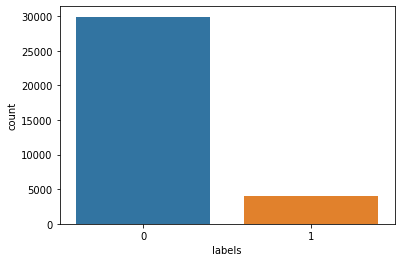

In [0]:
sns.countplot(x='labels',data=train)

In [42]:
labels.value_counts()

0    29941
1     3967
Name: labels, dtype: int64

# Imbalanced Dataset

#### Applying oversampling technique

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
x_sm,y_sm = smote.fit_sample(features,labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
splits = StratifiedShuffleSplit(random_state= 1,test_size=0.2,n_splits=1)
for train_index,test_index in splits.split(x_sm,y_sm):
  X_train,X_test = x_sm[train_index],x_sm[test_index]
  y_train,y_test = y_sm[train_index],y_sm[test_index]

In [199]:
features.shape

(33908, 16)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
splits = StratifiedShuffleSplit(random_state= 1,test_size=0.2,n_splits=1)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.loc[train_index],X.loc[test_index]
  y_train,y_test = labels[train_index],labels[test_index]

In [214]:
X_train.shape

(27126, 15)

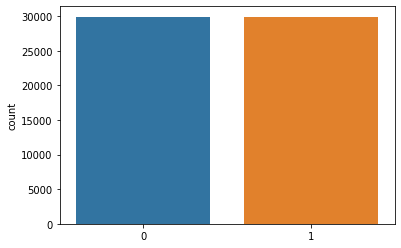

In [47]:
sns.countplot(y_sm)

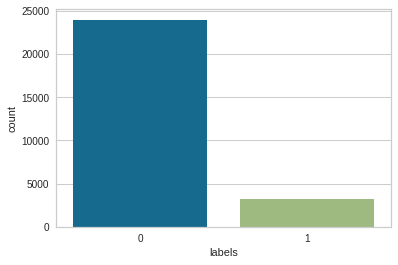

In [132]:
sns.countplot(y_train)

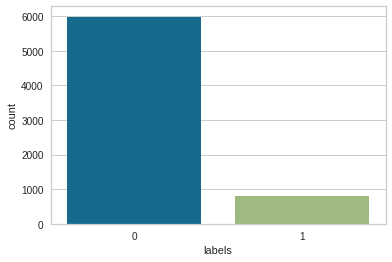

In [133]:
sns.countplot(y_test)

# Normalizing Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train_scaled = minmax.fit_transform(X_train)
x_test_scaled = minmax.fit_transform(X_test)

In [216]:
X_train.shape,y_train.shape

((27126, 15), (27126,))

In [218]:
x_train_scaled.shape,x_test_scaled.shape

((27126, 15), (6782, 15))

# SGDClassifier

In [335]:
from sklearn.linear_model import SGDClassifier
from scipy.stats import itemfreq
model = SGDClassifier(max_iter=1000, 
                      tol=1e-3, 
                      class_weight='balanced')
# Train
model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))

Accuracy: 79.96%
[[   0 5695]
 [   1 6282]]
0.7763239875389408


# Tuning

In [155]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'penalty': ['l2', 'l1','elasticnet'],
                      'l1_ratio': np.arange(0,1,0.01), #[0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                      'alpha': [0.0001, 0.001, 0.01, 0.0002, 0.002, 0.02, 0.0005, 0.005, 0.05],
                      'fit_intercept': [True, False],
                      'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                      'eta0': [0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5]
                     }    

model_grid = RandomizedSearchCV(estimator=SGDClassifier(max_iter=1000, 
                      tol=1e-3, 
                      class_weight='balanced'), 
                                        param_distributions=param_grid, scoring='recall', n_iter=5, 
                                        cv=5, random_state=seed, n_jobs=-1)

model_grid.fit(X_train,y_train)
model = model_grid.best_estimator_
best_model = model_grid.best_estimator_
best_model_param = model_grid.best_params_   

print(best_model)

SGDClassifier(alpha=0.0002, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.45, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)


Accuracy: 79.49%
[[   0 5695]
 [   1 6282]]
0.8123288543590396


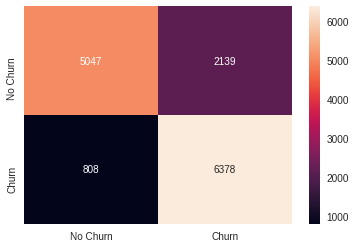

In [158]:
# Train
best_model.fit(X_train, y_train)
# Predict
y_pred_wtd = best_model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

In [0]:
def splitting(m, train,label,test, random_state = 9):
    a = list()
    sss=StratifiedShuffleSplit(random_state= random_state,test_size=0.2,n_splits=5)
    for tr_index, te_index in sss.split(train,label):
        xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain, ytest = label[tr_index], label[te_index]   
        m.fit(xtrain,ytrain)
        p = m.predict_proba(xtest)
        a.append(loss(p,pd.get_dummies(ytest).values))
    #pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()
    print(np.mean(a))
    return(pd.DataFrame(m.predict_proba(test)))

In [184]:
a = list()
sss=StratifiedShuffleSplit(random_state= 10,test_size=0.2,n_splits=5)
for tr_index, te_index in sss.split(features,labels):
  xtrain, xtest = features.loc[tr_index], features.loc[te_index]
  ytrain, ytest = labels[tr_index], labels[te_index] 
  model.fit(xtrain,ytrain)
  p = model.predict(xtest)
  a.append(f1_score(ytest,p))
    #pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()
print(np.mean(a))

0.9958481282587863


Accuracy: 96.31%
[[   0 5695]
 [   1 6282]]
0.9493253373313343


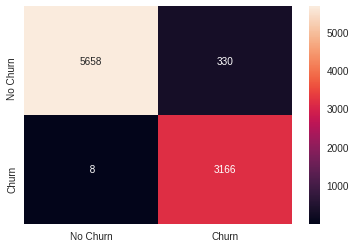

In [304]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
model = clf.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

# New Oversampled Data training

Accuracy: 96.54%
[[   0 5695]
 [   1 6282]]
0.9584440686156076


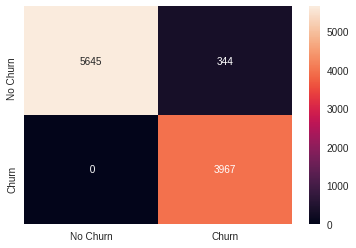

In [316]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
model = clf.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

2nd Oversampled Data newdata1

Accuracy: 96.84%
[[   0 5695]
 [   1 6282]]
0.9681861762398675


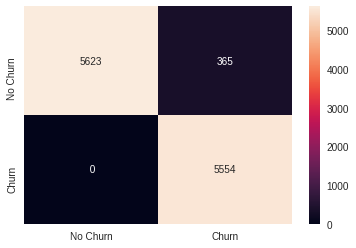

In [343]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
model = clf.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

# tune rf 

In [0]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# Predictions

In [0]:
test.drop('feature_15',axis=1,inplace=True)

In [346]:
test_labels = model.predict(test)
df_pred = pd.DataFrame({'labels' : test_labels})
df_pred.to_excel('rf2.xlsx',index=False)
df_pred.shape

(11303, 1)

# SVC Classifier

Accuracy: 84.29%
0.5504432249894471


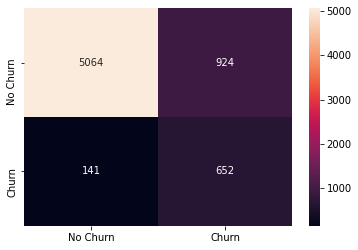

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score
# Create support vector classifier
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# Train classifier
model = svc.fit(X_train ,y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

# XGBOOST Classifier for imbalanced dataset

In [0]:
dict_train = y_train.value_counts().to_dict()

In [232]:
dict_train

{0: 4191, 1: 555}

In [235]:
[i for i in dict_train.keys()]

[0, 1]

In [0]:
pos_examples = dict_train[[i for i in dict_train.keys()][0]]
neg_examples = dict_train[[i for i in dict_train.keys()][1]]

In [238]:
np.sqrt(neg_examples / pos_examples)

0.36390469698757755

In [0]:
dict_test = y_test.value_counts().to_dict()

In [239]:
np.sqrt(dict_test[[i for i in dict_train.keys()][1]]/dict_train[[i for i in dict_test.keys()][0]])

0.23830307593682973

In [244]:
import random


[0.9477249929926744,
 0.9760459536185425,
 0.5019974394528612,
 0.2588753988755874,
 0.2450821221480185,
 0.36527495068973503,
 0.07076231934628141,
 0.23443090381709453,
 0.37621330818349863,
 0.563865367004135]

{'subsample': 1, 'scale_pos_weight': 0.3278577532947792, 'n_estimators': 400, 'min_child_weight': 2, 'max_depth': 100, 'learning_rate': 0.8300000000000001, 'colsample_bytree': 0.7}
Accuracy: 96.58%
[[   0 5695]
 [   1 6282]]
0.9528969149736645


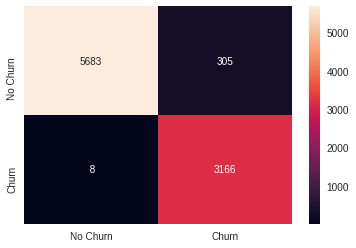

In [306]:
param_grid = {'learning_rate': np.arange(0,1,0.01), #[0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                          'n_estimators':[10, 30, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                          'subsample': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1],
                          'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)], 
                          'colsample_bytree': [0.5, 0.7, 0.9, 1],
                          'min_child_weight': [1, 2, 3, 4],
                          'scale_pos_weight' : [random.uniform(0, 1) for i in range(10)]
                         }

model_grid = RandomizedSearchCV(estimator=XGBClassifier(random_state=seed, n_jobs=-1, verbosity=0), 
                                        param_distributions=param_grid, scoring='accuracy', n_iter=10, 
                                        cv=5, random_state=1 ,n_jobs=-1)
model_grid.fit(X_train,y_train)
model = model_grid.best_estimator_
print(model_grid.best_params_)
# Train classifier
model = model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

In [307]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.8300000000000001, max_delta_step=0, max_depth=100,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3032,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278577532947792,
              seed=None, silent=None, subsample=1, verbosity=0)

Accuracy: 96.85%
[[   0 5695]
 [   1 6282]]
0.9618839524156348


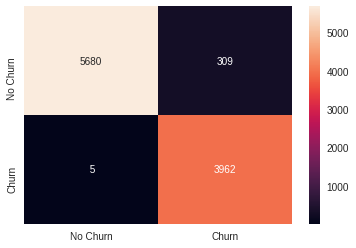

In [314]:
# Train classifier
model = model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

# New Data

Accuracy: 97.18%
[[   0 5695]
 [   1 6282]]
0.9691603053435114


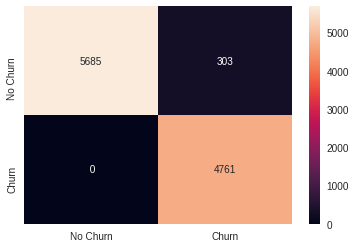

In [332]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.8300000000000001, max_delta_step=0, max_depth=100,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3032,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278577532947792,
              seed=None, silent=None, subsample=1, verbosity=0)
rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
lgbm = 

model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

In [100]:
from sklearn.utils.class_weight import compute_sample_weight
y = y_train.values
compute_sample_weight(class_weight='balanced', y=y)

array([4.27331443, 0.56625475, 0.56625475, ..., 0.56625475, 0.56625475,
       0.56625475])

Accuracy: 63.30%
[[   0 5695]
 [   1 6282]]
0.43217158176943693


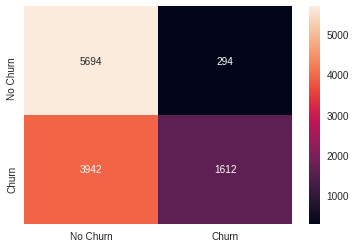

In [348]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_features=2, max_depth=2, random_state=0)

model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

In [103]:
model_names = ['rf','gbc','xgb','lgbm']
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 0.5
sample_weights[y_train == 1] = 9.1

xgboost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.8300000000000001, max_delta_step=0, max_depth=100,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3032,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278577532947792,
              seed=None, silent=None, subsample=1, verbosity=0)

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight={0:1,1:2}, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=1486, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_features=2, max_depth=2,random_state=0)

estimator_list = [rf,gbc,xgboost,lightgbm]
estimator_list_ = []
for i,model in enumerate(model_names):
  estimator_list_.append((model,estimator_list[i]))


vt = VotingClassifier(estimators = estimator_list_, voting='soft',n_jobs=-1)
vt.fit(X_train,y_train)
y_vt_pred = vt.predict(X_test)

print(f'Voting classifier Accuracy Score : {accuracy_score(y_test,y_vt_pred)}')
print(f'Voting classifier F1 Score : {f1_score(y_test,y_vt_pred)}')

Voting classifier Accuracy Score : 0.9016369267069754
Voting classifier F1 Score : 0.44370308590492075


# Predictions

In [333]:
test_labels = model.predict(test)
df_pred = pd.DataFrame({'labels' : test_labels})
df_pred.to_excel('xgb1.xlsx',index=False)
df_pred.shape

(11303, 1)

# Lightgbm

In [0]:
model= lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=1486, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Accuracy: 89.05%
[[   0 5695]
 [   1 6282]]
0.8670731707317073


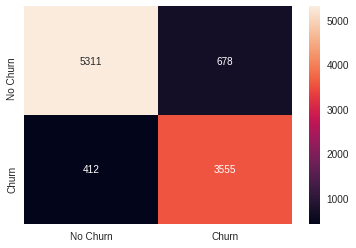

In [324]:
model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

# ExtraTreeClassifier

In [0]:
neg = train[train['labels']==1]

In [267]:
train[train['labels']==0].shape

(29941, 17)

In [266]:
neg.shape

(3967, 17)

In [268]:
train.labels.value_counts(normalize=True)

0    0.883007
1    0.116993
Name: labels, dtype: float64

In [270]:
newtrain = pd.concat([train,neg],axis=0)
newtrain.shape

(37875, 17)

In [290]:
newtrain = pd.concat([newtrain,neg],axis=0)
newtrain.shape

(45809, 17)

In [336]:
newtrain1 = pd.concat([newtrain1,neg],axis=0)
newtrain1.shape

(57710, 17)

In [337]:
newtrain.labels.value_counts(normalize=True)

0    0.653605
1    0.346395
Name: labels, dtype: float64

In [338]:
newtrain1.labels.value_counts(normalize=True)

0    0.518818
1    0.481182
Name: labels, dtype: float64

In [0]:
X = newtrain1.drop('labels',axis=1)
y = newtrain1['labels']

In [0]:
X.drop('feature_15',axis=1,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
splits = StratifiedShuffleSplit(random_state= 1,test_size=0.2,n_splits=1)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [0]:
xtrainscaled = mn.fit_transform(X_train)
xtestscaled = mn.fit_transform(X_test)

In [294]:
from sklearn.linear_model import SGDClassifier
from scipy.stats import itemfreq
model = SGDClassifier(max_iter=1000, 
                      tol=1e-3, 
                      class_weight='balanced',random_state=1)
# Train
model.fit(X_train, y_train)
# Predict
y_pred_wtd = model.predict(X_test)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))

Accuracy: 81.01%
[[   0 5695]
 [   1 6282]]
0.7366828087167071


In [295]:
test.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15'],
      dtype='object')

In [297]:
test_labels = model.predict(test)
df_pred = pd.DataFrame({'labels' : test_labels})
df_pred.to_excel('sssssubmit.xlsx',index=False)
df_pred.shape

(11303, 1)

Accuracy: 88.16%
[[   0 5695]
 [   1 6282]]
0.29325513196480935


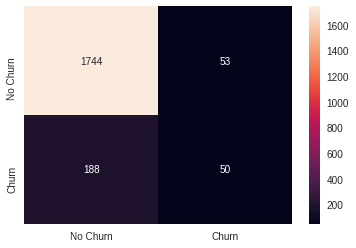

In [258]:
model = ExtraTreesClassifier(random_state=1,class_weight='balanced')
# Train classifier
model = model.fit(xtrainscaled, y_train)
# Predict
y_pred_wtd = model.predict(xtestscaled)
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred_wtd)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print(itemfreq(y_pred))
print(f1_score(y_test, y_pred_wtd))
cm = confusion_matrix(y_test,y_pred_wtd)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

# Model Comparison

In [223]:
cols = ['feature_'+str(cols) for cols in range(X.shape[1])]
print(cols)
df = pd.DataFrame(x_train_scaled,columns=cols)
df['labels'] =y_train

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14']


In [224]:
df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'labels'],
      dtype='object')

In [0]:
df_test = pd.DataFrame(x_test_scaled,columns=cols)
df_test['labels'] =y_test

## Model Comparison using PYCARET

In [226]:
# Importing module and initializing setup
from pycaret.classification import *
features['labels'] = labels
clf1 = setup(data = df ,target = 'labels')
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.882200,0.485800,0.000000,0.000000,0.000000,0.000000
1,SVM - Linear Kernel,0.882200,0.000000,0.000000,0.000000,0.000000,0.000000
2,Ridge Classifier,0.882200,0.000000,0.000000,0.000000,0.000000,0.000000
3,Linear Discriminant Analysis,0.882200,0.484900,0.000000,0.000000,0.000000,0.000000
4,Extreme Gradient Boosting,0.882200,0.500900,0.000000,0.000000,0.000000,0.000000
5,Light Gradient Boosting Machine,0.882000,0.490800,0.000000,0.000000,0.000000,-0.000400
6,Ada Boost Classifier,0.881800,0.492100,0.000000,0.000000,0.000000,-0.000800
7,CatBoost Classifier,0.881800,0.494000,0.000600,0.100000,0.001100,-0.000100
8,Gradient Boosting Classifier,0.881400,0.493800,0.001100,0.100000,0.002200,0.000100
9,Extra Trees Classifier,0.879800,0.487700,0.007800,0.232800,0.015000,0.006900


# Stacking Classifier

In [62]:
# create individual models for stacking
xgb = create_model('xgboost')
cat = create_model('catboost')
lgb = create_model('lightgbm')
rf = create_model('rf')
# stacking models
stacker = stack_models(estimator_list = [rf,lgb,cat], meta_model = xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9469,0.9918,0.9386,0.9545,0.9465,0.8939
1,0.9359,0.9883,0.9261,0.9446,0.9353,0.8718
2,0.9478,0.9907,0.9422,0.9530,0.9475,0.8956
3,0.9496,0.9915,0.9428,0.9559,0.9493,0.8992
4,0.9484,0.9908,0.9451,0.9514,0.9483,0.8968
5,0.9395,0.9892,0.9350,0.9434,0.9392,0.8789
6,0.9478,0.9917,0.9385,0.9562,0.9473,0.8956
7,0.9418,0.9888,0.9379,0.9453,0.9416,0.8837
8,0.9538,0.9923,0.9499,0.9573,0.9536,0.9075
9,0.9502,0.9916,0.9511,0.9494,0.9502,0.9004


In [63]:
stacker

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=1486,
                        verbose=0, warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=1486, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000

# VotingClassifier Model

In [0]:
model_names = ['lg','rf','ada','gbc','xgb','lgbm','et']

estimator_list = [lr,rf,ada,gbc,xgboost,lightgbm,et]
estimator_list_ = {}
for i,model in enumerate(model_names):
  estimator_list_[model] = estimator_list[i]

In [95]:
# blending all models
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,f1_score
seed = 1
lr = LogisticRegression(random_state=seed)
knn = KNeighborsClassifier()
svm = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
rf = RandomForestClassifier(n_estimators=10, random_state=seed)
ada = AdaBoostClassifier(random_state=seed)
gbc = GradientBoostingClassifier(random_state=seed)
et = ExtraTreesClassifier(random_state=seed)
xgboost = XGBClassifier(random_state=seed, n_jobs=-1, verbosity=0)
lightgbm = lgb.LGBMClassifier(random_state=seed)

model_names = ['lg','rf','ada','gbc','xgb','lgbm','et']

estimator_list = [lr,rf,ada,gbc,xgboost,lightgbm,et]
estimator_list_ = []
for i,model in enumerate(model_names):
  estimator_list_.append((model,estimator_list[i]))


vt = VotingClassifier(estimators = estimator_list_, voting='hard',n_jobs=-1)
vt.fit(X_train,y_train)
y_vt_pred = vt.predict(X_test)

print(f'Voting classifier Accuracy Score : {accuracy_score(y_test,y_vt_pred)}')
print(f'Voting classifier F1 Score : {f1_score(y_test,y_vt_pred)}')

Voting classifier Accuracy Score : 0.9063559946910485
Voting classifier F1 Score : 0.4948289578361177


#Based on all above Algorithms tried the best model was determined to be ExtraTreeClassifier with a F1_Score of 95%

# Hyperparameter tuning of ExtraTreeClassifier using pycaret

In [64]:
tuned_et = tune_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9454,0.9892,0.9696,0.9249,0.9467,0.8909
1,0.9419,0.9875,0.9726,0.9163,0.9436,0.8837
2,0.9448,0.9901,0.9642,0.9282,0.9459,0.8897
3,0.9466,0.9903,0.9690,0.9275,0.9478,0.8932
4,0.9457,0.9887,0.9684,0.9264,0.9469,0.8914
5,0.9424,0.9889,0.9654,0.9230,0.9437,0.8849
6,0.9517,0.9915,0.9726,0.9336,0.9527,0.9034
7,0.9409,0.9870,0.9618,0.9233,0.9421,0.8819
8,0.9427,0.9895,0.9684,0.9211,0.9442,0.8855
9,0.9383,0.9893,0.9702,0.9119,0.9402,0.8765


# Tuned Parameters

In [65]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=90, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=105,
                     n_jobs=None, oob_score=False, random_state=1486, verbose=0,
                     warm_start=False)

# Applying tuned parameters

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

tuned_et.fit(X_train,y_train)
y_pred = tuned_et.predict(X_test)

In [71]:
tuned_et.feature_importances_

array([0.0487908 , 0.03696422, 0.05673485, 0.26450695, 0.05625149,
       0.04086911, 0.02538784, 0.04327762, 0.05660831, 0.04992199,
       0.00555802, 0.10077001, 0.05285847, 0.07538015, 0.08612016])

# Feature Importance Plot

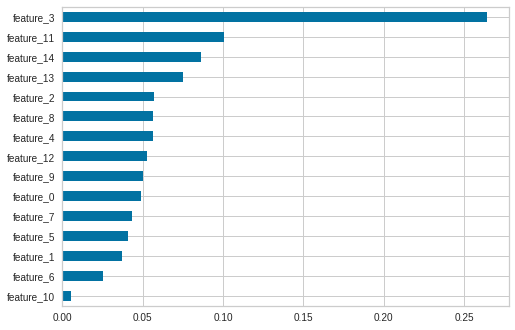

In [76]:
pd.Series(tuned_et.feature_importances_, index = features.columns).sort_values(ascending=True).plot.barh()

F1_Score :  0.9554233558797164


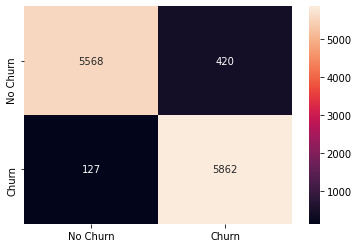

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,plot_precision_recall_curve,plot_roc_curve

print('F1_Score : ',f1_score(y_pred,y_test))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='2g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])

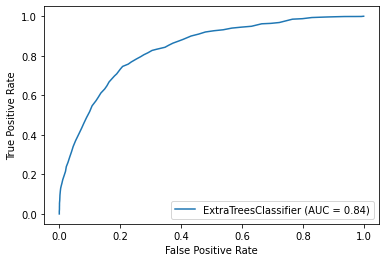

In [68]:
plot_roc_curve(et,X_test,y_test)

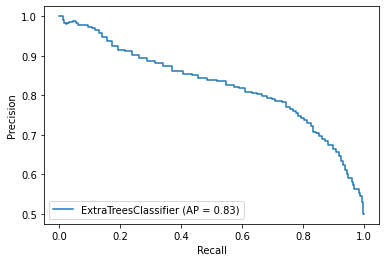

In [69]:
plot_precision_recall_curve(et,X_test,y_test)

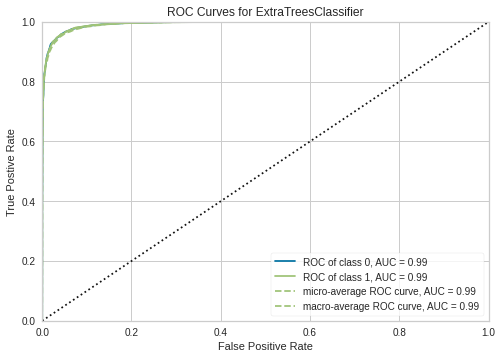

In [70]:
plot_model(et,plot='auc')

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5988
           1       0.93      0.98      0.96      5989

    accuracy                           0.95     11977
   macro avg       0.96      0.95      0.95     11977
weighted avg       0.96      0.95      0.95     11977



# Retraining the Model on the entire training data sample

In [89]:
x_sm.shape,y_sm.shape

((59882, 15), (59882,))

In [0]:
classifier = tuned_et.fit(x_sm,y_sm)

In [91]:
classifier

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=90, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=105,
                     n_jobs=None, oob_score=False, random_state=1486, verbose=0,
                     warm_start=False)

# Applying the trained model on test *data*

In [117]:
test.shape

(11303, 15)

In [0]:
mn = MinMaxScaler()
test_scaled = mn.fit_transform(test)

In [188]:
test_scaled.shape

(11303, 16)

In [0]:
#test_labels = classifier.predict(test_scaled )
test_labels = model.predict(test_scaled)
#test_labels = best_model.predict(test_scaled)

In [97]:
type(test_labels)

numpy.ndarray

In [0]:
df_pred = pd.DataFrame({'labels' : test_labels})

In [0]:
df_pred.to_excel('sssubmit.xlsx',index=False)

In [264]:
df_pred.shape

(11303, 1)

### New Experiment 

In [3]:
train.shape,test.shape

((33908, 17), (11303, 16))

In [0]:
## Sklearn Libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report, recall_score, precision_recall_curve

In [0]:
# Define random state
import warnings
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

# Class Distribution

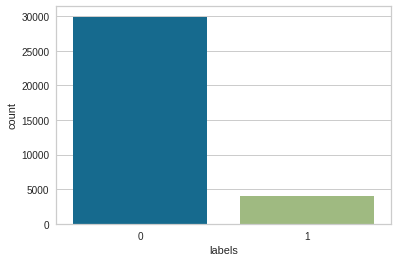

In [361]:
sns.countplot(Y)

In [377]:
train.feature_7.value_counts()

1     7286
4     7137
9     5691
0     3891
7     3094
5     1683
6     1164
2     1118
10     988
3      938
8      700
11     218
Name: feature_7, dtype: int64

In [378]:
train.feature_8.value_counts()

1    20434
2     9637
0     3837
Name: feature_8, dtype: int64

In [379]:
train.feature_9.value_counts()

1    17380
2     9974
0     5147
3     1407
Name: feature_9, dtype: int64

In [380]:
train.feature_10.value_counts()

0    33293
1      615
Name: feature_10, dtype: int64

In [381]:
train.feature_11.value_counts()

1    18836
0    15072
Name: feature_11, dtype: int64

In [382]:
train.feature_12.value_counts()

0    28494
1     5414
Name: feature_12, dtype: int64

In [383]:
train.feature_13.value_counts()

0    21978
2     9751
1     2179
Name: feature_13, dtype: int64

In [384]:
train.feature_14.value_counts()

8     10273
5      5187
1      4672
6      4021
9      3005
0      2193
3      2013
4      1071
10      545
11      427
7       351
2       150
Name: feature_14, dtype: int64

In [385]:
train.feature_15.value_counts()

3    27756
0     3661
1     1365
2     1126
Name: feature_15, dtype: int64

In [0]:
cols = ['feature_'+str(i) for i in range(7,16)]

In [7]:
cols

['feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15']

# Biining train categorical values

In [8]:
for col in cols:
  print(col,':',train[col].nunique())
  name = col+"_enc"
  train[name]  = pd.cut(train[col],bins=4, labels=False)

feature_7 : 12
feature_8 : 3
feature_9 : 4
feature_10 : 2
feature_11 : 2
feature_12 : 2
feature_13 : 3
feature_14 : 12
feature_15 : 4


# Binning test categorical values

In [11]:
for col in cols:
  print(col,':',test[col].nunique())
  name = col+"_enc"
  test[name]  = pd.cut(test[col],bins=4, labels=False)

feature_7 : 12
feature_8 : 3
feature_9 : 4
feature_10 : 2
feature_11 : 2
feature_12 : 2
feature_13 : 3
feature_14 : 12
feature_15 : 4


In [0]:
new_train = train.drop(cols,axis=1)
new_test = train.drop(cols,axis=1)

In [13]:
new_train.shape

(33908, 17)

In [406]:
new_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,labels,feature_7_enc,feature_8_enc,feature_9_enc,feature_10_enc,feature_11_enc,feature_12_enc,feature_13_enc,feature_14_enc,feature_15_enc
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,1,1,0,1,0,0,0,0,3,2
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,0,1,1,2,0,3,0,0,0,3
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,0,2,1,2,0,0,0,0,1,3
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,0,1,0,2,0,3,0,0,1,3
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,0,1,1,0,0,0,0,2,3


In [0]:
X = new_train.drop('labels',axis=1)
y= new_train['labels']

In [37]:
X.feature_10_enc.value_counts()

0    33293
3      615
Name: feature_10_enc, dtype: int64

In [0]:
cor = new_train.corr().loc['labels',:].to_dict()

In [0]:
sorted_corr = sorted(cor.items(), key=lambda x: -x[1])

In [12]:
sorted_corr 

[('labels', 1.0),
 ('feature_3', 0.3929706218652469),
 ('feature_6', 0.11932175355691448),
 ('feature_5', 0.10623853550963232),
 ('feature_9_enc', 0.06835621705223774),
 ('feature_8_enc', 0.05642779241243215),
 ('feature_1', 0.04861127825217424),
 ('feature_7_enc', 0.028849533570709938),
 ('feature_0', 0.019405480189140442),
 ('feature_14_enc', -0.007869918042853521),
 ('feature_10_enc', -0.023343871506818385),
 ('feature_2', -0.03334522349069884),
 ('feature_12_enc', -0.06547992907616393),
 ('feature_4', -0.07502539257437615),
 ('feature_15_enc', -0.07918973452656626),
 ('feature_11_enc', -0.13566158602003914),
 ('feature_13_enc', -0.15042832897105524)]

In [13]:
train.groupby('feature_7_enc')['labels'].mean().to_dict()

{0: 0.08914192761285075,
 1: 0.14951834392293503,
 2: 0.12424364663170634,
 3: 0.1154124981876178}

# Create new train features

In [0]:
for col in cols:
  name = col+"_enc"
  newname = col+"_label_ratio"
  train[newname] = train[col].map(train.groupby(col)['labels'].mean().to_dict())

# Create Test Features

In [0]:
for col in cols:
  name = col+"_enc"
  newname = col+"_label_ratio"
  test[newname] = test[col].map(train.groupby(col)['labels'].mean().to_dict())

In [16]:
test.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_7_label_ratio', 'feature_8_label_ratio',
       'feature_9_label_ratio', 'feature_10_label_ratio',
       'feature_11_label_ratio', 'feature_12_label_ratio',
       'feature_13_label_ratio', 'feature_14_label_ratio',
       'feature_15_label_ratio'],
      dtype='object')

## Find Correlation of Labels with features created

In [17]:
nc = train.corr().loc['labels',:].to_dict()
nc_sort = sorted(nc.items(), key=lambda x: -x[1])
nc_sort

[('labels', 1.0),
 ('feature_3', 0.3929706218652469),
 ('feature_15_label_ratio', 0.3151559519016907),
 ('feature_14_label_ratio', 0.25505667380593816),
 ('feature_13_label_ratio', 0.15102428617754962),
 ('feature_11_label_ratio', 0.13566158602003828),
 ('feature_7_label_ratio', 0.13452269021681162),
 ('feature_6', 0.11932175355691448),
 ('feature_5', 0.10623853550963232),
 ('feature_9_label_ratio', 0.0772011029522367),
 ('feature_8_label_ratio', 0.06866612528655353),
 ('feature_9', 0.06835621705223774),
 ('feature_9_enc', 0.06835621705223774),
 ('feature_12_label_ratio', 0.06547992907617789),
 ('feature_8_enc', 0.05642779241243215),
 ('feature_1', 0.04861127825217424),
 ('feature_8', 0.04619264771376082),
 ('feature_7', 0.03858751882164452),
 ('feature_7_enc', 0.028849533570709938),
 ('feature_10_label_ratio', 0.023343871506783444),
 ('feature_0', 0.019405480189140442),
 ('feature_14_enc', -0.007869918042853521),
 ('feature_10', -0.023343871506798872),
 ('feature_10_enc', -0.023343871

In [0]:
selected_features = [ k for k,v in nc_sort if v > 0.09 ]


In [19]:
selected_features

['labels',
 'feature_3',
 'feature_15_label_ratio',
 'feature_14_label_ratio',
 'feature_13_label_ratio',
 'feature_11_label_ratio',
 'feature_7_label_ratio',
 'feature_6',
 'feature_5']

In [0]:
drop_features = cols + [col for col in train.columns if '_enc' in col]

In [21]:
drop_features

['feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_7_enc',
 'feature_8_enc',
 'feature_9_enc',
 'feature_10_enc',
 'feature_11_enc',
 'feature_12_enc',
 'feature_13_enc',
 'feature_14_enc',
 'feature_15_enc']

In [0]:
new_train = train.drop(drop_features,axis=1)

"""new_train = train[['labels',
 'feature_3',
 'feature_15_label_ratio',
 'feature_14_label_ratio',
 'feature_13_label_ratio',
 'feature_11_label_ratio',
 'feature_7_label_ratio',
 'feature_6',
 'feature_5']]"""
X = new_train.drop('labels',axis=1)
y = new_train['labels']

In [24]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = new_train,target = 'labels')
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.901700,0.902100,0.377800,0.633500,0.470800,0.420800
1,Gradient Boosting Classifier,0.900800,0.905500,0.403900,0.617400,0.486500,0.434500
2,Extra Trees Classifier,0.900600,0.890300,0.317400,0.653400,0.423700,0.377000
3,CatBoost Classifier,0.898600,0.907400,0.384800,0.607100,0.468000,0.415400
4,Ridge Classifier,0.898300,0.000000,0.242900,0.687300,0.355500,0.314300
5,Ada Boost Classifier,0.898000,0.889700,0.384800,0.600200,0.467200,0.414000
6,Linear Discriminant Analysis,0.896100,0.892500,0.401500,0.576000,0.471300,0.416200
7,Logistic Regression,0.895500,0.890000,0.269000,0.617500,0.370500,0.324200
8,Random Forest Classifier,0.895200,0.863500,0.310000,0.604300,0.408700,0.357700
9,Light Gradient Boosting Machine,0.894100,0.900100,0.380100,0.571800,0.454800,0.399000


## Lightgbm

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
scores = []

splits = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]
  #X_train = X_train[selected_features]
  #X_test = X_test[selected_features]
  #print(f'labels : \n {y_train.value_counts()}')
  model = lgb.LGBMClassifier(max_depth=15,n_estimators=100,random_state=1,class_weight={0:1,1:2})
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  scores.append(f1_score(y_test,predictions))
  print(f1_score(y_test,predictions))
  

print(f'Max Scores : {max(scores)}')
print(f'Min Scores : {min(scores)}')
print(f'Mean of all the scores : {np.mean(scores)}')

0.5996631106120157
0.616898148148148
0.6123399301513387
0.625287356321839
0.6344908769864626
Max Scores : 0.6344908769864626
Min Scores : 0.5996631106120157
Mean of all the scores : 0.6177358844439608


##Tune Lightgbm

In [0]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {#'boosting_type' : ['gbdt', 'dart', 'goss', 'rf'],
                      'num_leaves': [10,20,30,40,50,60,70,80,90,100,150,200],
                      'max_depth': [15,18,22,25,30],
                      'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                      'n_estimators': [100, 150, 170,200], 
                      'min_split_gain' : [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                      'reg_alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                      'reg_lambda': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
                      }
    
model_grid = RandomizedSearchCV(estimator=lgb.LGBMClassifier(random_state=1,class_weight={0:1,1:2}), 
                                        param_distributions=param_grid, scoring='f1', n_iter=10, 
                                        cv=5, random_state=1, n_jobs=-1)

model_grid.fit(X_train,y_train)
model = model_grid.best_estimator_
best_model = model_grid.best_estimator_
best_model_param = model_grid.best_params_

In [81]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 2},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=18, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.8, n_estimators=200, n_jobs=-1, num_leaves=60,
               objective=None, random_state=1, reg_alpha=0.5, reg_lambda=0.9,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
scores = []
splits = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]
  #X_train = X_train[selected_features]
  #X_test = X_test[selected_features]
  #print(f'labels : \n {y_train.value_counts()}')
  model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 2},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=18, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.8, n_estimators=200, n_jobs=-1, num_leaves=60,
               objective=None, random_state=1, reg_alpha=0.5, reg_lambda=0.9,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  scores.append(f1_score(y_test,predictions))
  print(f1_score(y_test,predictions))
  

print(f'Max Scores : {max(scores)}')
print(f'Min Scores : {min(scores)}')
print(f'Mean of all the scores : {np.mean(scores)}')

0.6037309214245337
0.6152046783625731
0.6069534472598703
0.634737449509521
0.6436915887850467
Max Scores : 0.6436915887850467
Min Scores : 0.6037309214245337
Mean of all the scores : 0.620863617068309


##RandomForestClassifier

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
scores = []

splits = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]
  #X_train = X_train[selected_features]
  #X_test = X_test[selected_features]
  #print(f'labels : \n {y_train.value_counts()}')
  model = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  scores.append(f1_score(y_test,predictions))
  print(f1_score(y_test,predictions))
  

print(f'Max Scores : {max(scores)}')
print(f'Min Scores : {min(scores)}')
print(f'Mean of all the scores : {np.mean(scores)}')

0.4815106215578285
0.47269763651181745
0.45257903494176377
0.47896440129449835
0.47882736156351796
Max Scores : 0.4815106215578285
Min Scores : 0.45257903494176377
Mean of all the scores : 0.47291581117388526


##XGBOOST

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
scores = []

splits = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]
  #X_train = X_train[selected_features]
  #X_test = X_test[selected_features]
  #print(f'labels : \n {y_train.value_counts()}')
  model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.8300000000000001, max_delta_step=0, max_depth=100,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3032,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9,
              seed=None, silent=None, subsample=1, verbosity=0)
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  scores.append(f1_score(y_test,predictions))
  print(f1_score(y_test,predictions))
  

print(f'Max Scores : {max(scores)}')
print(f'Min Scores : {min(scores)}')
print(f'Mean of all the scores : {np.mean(scores)}')

0.49965108164689465
0.5285913528591352
0.526536312849162
0.534996534996535
0.5181058495821728
Max Scores : 0.534996534996535
Min Scores : 0.49965108164689465
Mean of all the scores : 0.5215762263867799


##CatboostClassifier

In [76]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
scores = []

splits = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
for train_index,test_index in splits.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]
  #X_train = X_train[selected_features]
  #X_test = X_test[selected_features]
  #print(f'labels : \n {y_train.value_counts()}')
  model = CatBoostClassifier(random_state=1, silent=True)
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  scores.append(f1_score(y_test,predictions))
  print(f1_score(y_test,predictions))
  

print(f'Max Scores : {max(scores)}')
print(f'Min Scores : {min(scores)}')
print(f'Mean of all the scores : {np.mean(scores)}')

0.5641389085754783
0.5504047093451068
0.528853177501826
0.5708092485549133
0.5380635624538064
Max Scores : 0.5708092485549133
Min Scores : 0.528853177501826
Mean of all the scores : 0.5504539212862262


##Selecting test features and applying LightGBM

In [0]:
new_test = test.drop(drop_features,axis=1)

In [85]:
new_test.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7_label_ratio',
       'feature_8_label_ratio', 'feature_9_label_ratio',
       'feature_10_label_ratio', 'feature_11_label_ratio',
       'feature_12_label_ratio', 'feature_13_label_ratio',
       'feature_14_label_ratio', 'feature_15_label_ratio'],
      dtype='object')

In [86]:
model

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 2},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=18, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.8, n_estimators=200, n_jobs=-1, num_leaves=60,
               objective=None, random_state=1, reg_alpha=0.5, reg_lambda=0.9,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [87]:
test_labels = model.predict(new_test)
df_pred = pd.DataFrame({'labels' : test_labels})
df_pred.to_excel('lgbmubmit.xlsx',index=False)
df_pred.shape

(11303, 1)

In [0]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=1, silent=True)

In [35]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)
f1_score(y_test,predictions)

0.3787489288774636

In [27]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.8300000000000001, max_delta_step=0, max_depth=100,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3032,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278577532947792,
              seed=None, silent=None, subsample=1, verbosity=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
f1_score(y_test,predictions)

0.45530939648586705